In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
# import dask.dataframe as dd

### Data Selection Step

## Exploration

In [57]:
dataset = pd.read_csv('balanced_data.csv')

In [58]:
dataset

,P_2_Ave_6,P_2_Min_6,P_2_Max_6,P_2_Ave_12,P_2_Min_12,P_2_Max_12,D_39_Ave_6,D_39_Min_6,D_39_Max_6,D_39_Ave_12,...,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,months_of_data,target
0,0.898251,0.652148,0.978503,0.768369,0.680439,0.862235,0.295993,0.000303,0.503219,0.254561,...,0.007337,0.003736,0.006081,0.006776,0.383556,0.009759,0.002700,0.008949,13.0,1.0
1,0.925501,0.904858,0.964869,0.675416,0.654632,0.688767,0.099762,0.000198,0.244733,0.016164,...,0.183504,1.007796,0.008506,0.921437,0.279321,1.001471,0.002188,0.099037,13.0,0.0
2,0.721482,0.681889,0.743058,0.974965,0.931903,1.009868,0.004645,0.002947,0.007828,0.135482,...,0.183504,0.003235,0.006570,0.004911,0.383556,0.009195,0.008338,0.000724,13.0,0.0
3,0.896253,0.819347,0.982669,0.786155,0.522695,0.853724,0.128521,0.000943,0.362524,0.342408,...,0.183504,0.001066,0.004487,0.003133,0.383556,0.007701,0.006815,0.005662,13.0,0.0
4,0.354935,0.333759,0.374558,0.794694,0.737052,0.844762,0.316497,0.001629,0.623054,0.004047,...,0.183504,0.000943,0.009813,0.001891,0.383556,0.003510,0.004220,0.001597,13.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94949,0.633888,0.625270,0.644149,0.932434,0.894847,0.950950,0.224170,0.003755,0.604710,0.175251,...,0.183504,0.003007,0.006930,0.007432,0.383556,0.001990,0.002962,0.006336,13.0,1.0
94950,0.486825,0.434724,0.526896,0.608580,0.577274,0.640479,0.077678,0.000633,0.346159,0.159362,...,0.183504,0.091105,0.012787,0.083989,0.383556,0.091059,0.027094,0.034330,13.0,1.0
94951,0.880549,0.846172,0.901473,0.880921,0.808601,0.944399,0.032442,0.003709,0.063302,0.173768,...,0.048395,0.000680,0.009483,0.008018,0.383556,0.008117,0.004365,0.004156,13.0,1.0
94952,0.923400,0.914410,0.936526,0.912614,0.878378,0.980936,0.040292,0.004747,0.076451,0.403834,...,0.183504,0.234926,0.006530,0.204046,0.341006,0.233881,0.050330,0.111068,13.0,1.0


In [59]:
dataset.shape

(94954, 1468)

# Feature selection using XGB

In [60]:
import xgboost as xgb
from sklearn.impute import SimpleImputer

### Split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(
    dataset.drop(['target'], axis=1),  # Thêm axis=1 để xóa cột
    dataset['target'],
    test_size=0.3,
    random_state=6
)


In [64]:
dataset

,P_2_Ave_6,P_2_Min_6,P_2_Max_6,P_2_Ave_12,P_2_Min_12,P_2_Max_12,D_39_Ave_6,D_39_Min_6,D_39_Max_6,D_39_Ave_12,...,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145,months_of_data,target
0,0.898251,0.652148,0.978503,0.768369,0.680439,0.862235,0.295993,0.000303,0.503219,0.254561,...,0.007337,0.003736,0.006081,0.006776,0.383556,0.009759,0.002700,0.008949,13.0,1.0
1,0.925501,0.904858,0.964869,0.675416,0.654632,0.688767,0.099762,0.000198,0.244733,0.016164,...,0.183504,1.007796,0.008506,0.921437,0.279321,1.001471,0.002188,0.099037,13.0,0.0
2,0.721482,0.681889,0.743058,0.974965,0.931903,1.009868,0.004645,0.002947,0.007828,0.135482,...,0.183504,0.003235,0.006570,0.004911,0.383556,0.009195,0.008338,0.000724,13.0,0.0
3,0.896253,0.819347,0.982669,0.786155,0.522695,0.853724,0.128521,0.000943,0.362524,0.342408,...,0.183504,0.001066,0.004487,0.003133,0.383556,0.007701,0.006815,0.005662,13.0,0.0
4,0.354935,0.333759,0.374558,0.794694,0.737052,0.844762,0.316497,0.001629,0.623054,0.004047,...,0.183504,0.000943,0.009813,0.001891,0.383556,0.003510,0.004220,0.001597,13.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94949,0.633888,0.625270,0.644149,0.932434,0.894847,0.950950,0.224170,0.003755,0.604710,0.175251,...,0.183504,0.003007,0.006930,0.007432,0.383556,0.001990,0.002962,0.006336,13.0,1.0
94950,0.486825,0.434724,0.526896,0.608580,0.577274,0.640479,0.077678,0.000633,0.346159,0.159362,...,0.183504,0.091105,0.012787,0.083989,0.383556,0.091059,0.027094,0.034330,13.0,1.0
94951,0.880549,0.846172,0.901473,0.880921,0.808601,0.944399,0.032442,0.003709,0.063302,0.173768,...,0.048395,0.000680,0.009483,0.008018,0.383556,0.008117,0.004365,0.004156,13.0,1.0
94952,0.923400,0.914410,0.936526,0.912614,0.878378,0.980936,0.040292,0.004747,0.076451,0.403834,...,0.183504,0.234926,0.006530,0.204046,0.341006,0.233881,0.050330,0.111068,13.0,1.0


In [65]:
# Impute missing values with NaN
imputer = SimpleImputer(strategy='constant', fill_value=np.nan)
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Convert the imputed arrays back to DataFrames
X_train_imputed = pd.DataFrame(X_train_imputed, columns=X_train.columns)
X_test_imputed = pd.DataFrame(X_test_imputed, columns=X_test.columns)

In [66]:
print(X_test['S_2'])

58729    17250
37330    17255
81360    17245
41488    17516
17431    17280
         ...  
40014    17496
4113     17233
75715    17338
9738     17239
65670    17244
Name: S_2, Length: 28487, dtype: int64


In [67]:
classifier = xgb.XGBClassifier(seed=6)
classifier.fit(X_train_imputed, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [68]:
classifier.feature_importances_

array([0.0000000e+00, 3.9862591e-04, 8.6304819e-05, ..., 5.1772414e-04,
       5.2357384e-04, 1.5426552e-03], dtype=float32)

In [70]:
# Get feature importances
feature_importances = {key: value for key, value in zip(dataset.drop(['target'],axis=1).columns, classifier.feature_importances_)}

# Filter features with importance higher than 0.5%
important_features = {k: v for k, v in feature_importances.items() if v > 0.005}

# Save the feature importances to a CSV file
importance_csv = pd.DataFrame.from_dict(important_features, orient='index', columns=['Importance'])
importance_csv.to_csv("feat_o.csv")

In [71]:
print(important_features)

{'D_51_Max_12': 0.007534324, 'B_38_3.0_Ever_Response_12': 0.0056705126, 'D_114_0.0_Ever_Response_12': 0.018938983, 'D_114_1.0_Ever_Response_6': 0.0075342883, 'D_114_1.0_Ever_Response_12': 0.015860852, 'D_117_-1.0_Ever_Response_12': 0.018377852, 'D_120_1.0_Ever_Response_6': 0.008006255, 'D_126_1.0_Ever_Response_6': 0.0064573595, 'P_2': 0.056788705, 'D_42': 0.007905943, 'D_44': 0.015397659, 'B_8': 0.020222431, 'D_51': 0.010606017, 'B_9': 0.01428372, 'R_3': 0.005505479, 'D_58': 0.0066562667, 'B_19': 0.0066699637, 'B_20': 0.017713616, 'B_22': 0.007825571, 'D_70': 0.011423265, 'B_33': 0.007060718, 'S_23': 0.0052358825, 'R_27': 0.005925569}


In [72]:
print(importance_csv.head(20))

                             Importance
D_51_Max_12                    0.007534
B_38_3.0_Ever_Response_12      0.005671
D_114_0.0_Ever_Response_12     0.018939
D_114_1.0_Ever_Response_6      0.007534
D_114_1.0_Ever_Response_12     0.015861
D_117_-1.0_Ever_Response_12    0.018378
D_120_1.0_Ever_Response_6      0.008006
D_126_1.0_Ever_Response_6      0.006457
P_2                            0.056789
D_42                           0.007906
D_44                           0.015398
B_8                            0.020222
D_51                           0.010606
B_9                            0.014284
R_3                            0.005505
D_58                           0.006656
B_19                           0.006670
B_20                           0.017714
B_22                           0.007826
D_70                           0.011423


In [73]:
##### Train the XGBoost classifier with specified parameters
classifier = xgb.XGBClassifier(n_estimators=300, learning_rate=0.5, max_depth=4, subsample=0.5, colsample_bytree=0.5, scale_pos_weight=5, seed=6)
classifier.fit(X_train_imputed, y_train)

# Get feature importances
feature_importances = {key: value for key, value in zip(X_train.columns, classifier.feature_importances_)}

# Filter features with importance higher than 0.5%
important_features_2 = {k: v for k, v in feature_importances.items() if v > 0.005}

# Save the feature importances to a CSV file
importance_csv_2 = pd.DataFrame.from_dict(important_features_2, orient='index', columns=['Importance'])
importance_csv_2.to_csv("feat_o_model_2.csv")

In [74]:
print(important_features_2)

{'B_38_1.0_Ever_Response_12': 0.005520443, 'B_38_2.0_Ever_Response_12': 0.008795539, 'P_2': 0.009682775, 'D_44': 0.0455933, 'B_8': 0.00826714, 'B_9': 0.005352956, 'D_52': 0.028702818, 'B_19': 0.005795679, 'D_70': 0.007557756, 'B_23': 0.008595137, 'D_75': 0.014661816, 'B_33': 0.0069679487}


In [75]:
print(importance_csv_2.head(10))

                           Importance
B_38_1.0_Ever_Response_12    0.005520
B_38_2.0_Ever_Response_12    0.008796
P_2                          0.009683
D_44                         0.045593
B_8                          0.008267
B_9                          0.005353
D_52                         0.028703
B_19                         0.005796
D_70                         0.007558
B_23                         0.008595


In [76]:
combined_important_features = list(set(important_features.keys()) | set(important_features_2.keys()))

In [77]:
print(combined_important_features)

['B_33', 'D_58', 'P_2', 'R_3', 'D_114_1.0_Ever_Response_6', 'D_70', 'D_120_1.0_Ever_Response_6', 'B_20', 'D_75', 'B_38_3.0_Ever_Response_12', 'D_42', 'R_27', 'D_44', 'B_9', 'D_126_1.0_Ever_Response_6', 'S_23', 'D_51_Max_12', 'B_19', 'B_38_1.0_Ever_Response_12', 'D_52', 'B_8', 'B_38_2.0_Ever_Response_12', 'D_114_0.0_Ever_Response_12', 'D_51', 'D_114_1.0_Ever_Response_12', 'B_22', 'B_23', 'D_117_-1.0_Ever_Response_12']


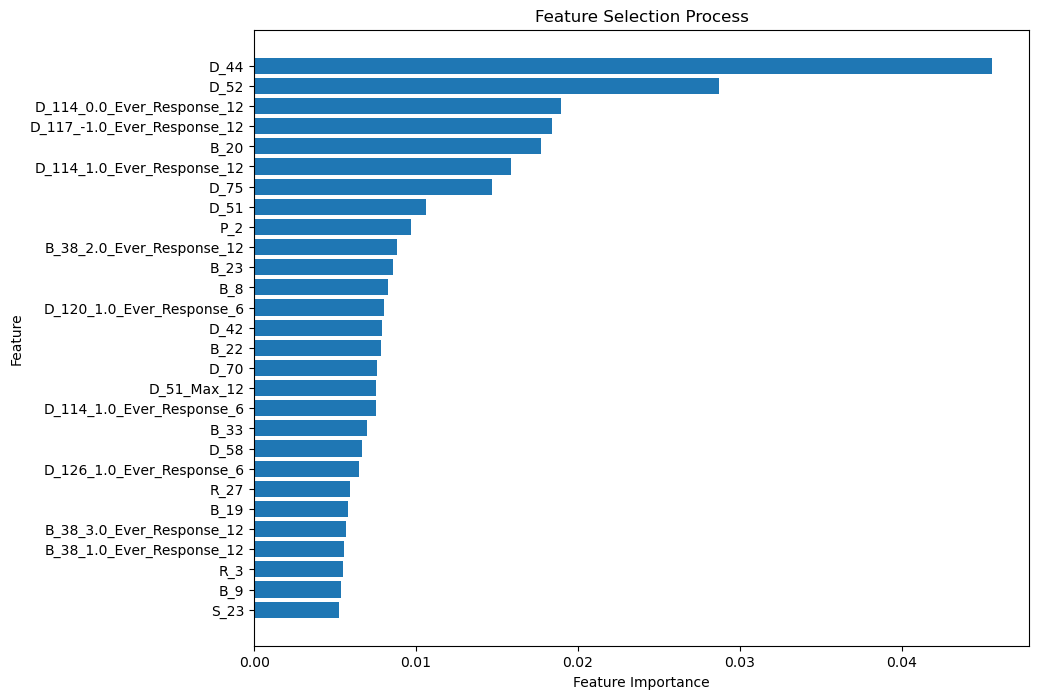

In [78]:
# Combine the feature importances from both models
all_feature_importances = {**important_features, **important_features_2}

# Sort the features by their importance
sorted_features = sorted(all_feature_importances.items(), key=lambda x: x[1], reverse=True)

# Separate the feature names and their importances
feature_names, importances = zip(*sorted_features)

# Create a bar plot
plt.figure(figsize=(10, 8))
plt.barh(feature_names, importances)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Selection Process')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature on top
plt.show()



In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

In [80]:
# Define the parameter grid with your specified parameters
param_grid = {
    'n_estimators': [50, 100, 300],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.5, 0.8],
    'colsample_bytree': [0.5, 1.0],
    'scale_pos_weight': [1, 5, 10]
}

# Create an empty list to store the results
results = []

# Iterate through each combination of parameters
for n_estimators in param_grid['n_estimators']:
    for learning_rate in param_grid['learning_rate']:
        for subsample in param_grid['subsample']:
            for colsample_bytree in param_grid['colsample_bytree']:
                for scale_pos_weight in param_grid['scale_pos_weight']:
                    # Train a model with the current combination of parameters
                    model = xgb.XGBClassifier(
                        n_estimators=n_estimators,
                        learning_rate=learning_rate,
                        subsample=subsample,
                        colsample_bytree=colsample_bytree,
                        scale_pos_weight=scale_pos_weight,
                        random_state=42
                    )
                    model.fit(X_train[combined_important_features], y_train)

                    # Compute AUC scores on Train and Test datasets
                    auc_train = roc_auc_score(y_train, model.predict_proba(X_train[combined_important_features])[:, 1])
                    auc_test = roc_auc_score(y_test, model.predict_proba(X_test_imputed[combined_important_features])[:, 1])

                    # Append the results to the list
                    results.append({
                        'Number of Trees': n_estimators,
                        'Learning Rate': learning_rate,
                        'Subsample': subsample,
                        'Percentage of Features': colsample_bytree * 100,
                        'Weight of Default': scale_pos_weight,
                        'AUC Train': auc_train,
                        'AUC Test': auc_test
                    })

# Convert the list of results to a DataFrame
results_df = pd.DataFrame(results)
print(results_df)


    Number of Trees  Learning Rate  Subsample  Percentage of Features  \
0                50           0.01        0.5                    50.0   
1                50           0.01        0.5                    50.0   
2                50           0.01        0.5                    50.0   
3                50           0.01        0.5                   100.0   
4                50           0.01        0.5                   100.0   
..              ...            ...        ...                     ...   
67              300           0.10        0.8                    50.0   
68              300           0.10        0.8                    50.0   
69              300           0.10        0.8                   100.0   
70              300           0.10        0.8                   100.0   
71              300           0.10        0.8                   100.0   

    Weight of Default  AUC Train  AUC Test  
0                   1   0.952650  0.949123  
1                   5   0.947450 

In [81]:
# Sort the results by AUC Test 
sorted_results_df = results_df.sort_values(by=['AUC Test'], ascending=False)

# Print the sorted table
print(sorted_results_df)

# Select the top row as the best model
best_model_row = sorted_results_df.iloc[0]
print("Best model parameters:")
print(best_model_row)

    Number of Trees  Learning Rate  Subsample  Percentage of Features  \
42              100           0.10        0.8                    50.0   
45              100           0.10        0.8                   100.0   
36              100           0.10        0.5                    50.0   
39              100           0.10        0.5                   100.0   
69              300           0.10        0.8                   100.0   
..              ...            ...        ...                     ...   
35              100           0.01        0.8                   100.0   
4                50           0.01        0.5                   100.0   
10               50           0.01        0.8                   100.0   
5                50           0.01        0.5                   100.0   
11               50           0.01        0.8                   100.0   

    Weight of Default  AUC Train  AUC Test  
42                  1   0.972794  0.962145  
45                  1   0.974110 

In [82]:
# Assuming best_model_row contains the best parameters
optimum_params = {
    'n_estimators': int(best_model_row['Number of Trees']),
    'learning_rate': best_model_row['Learning Rate'],
    'subsample': best_model_row['Subsample'],
    'colsample_bytree': best_model_row['Percentage of Features'] / 100,
    'scale_pos_weight': best_model_row['Weight of Default'],
    'random_state': 42
}

# Re-train the model with the optimum parameters
final_model_xgb = xgb.XGBClassifier(**optimum_params)
final_model_xgb.fit(X_train[combined_important_features], y_train)

# Save the final model
import joblib
joblib.dump(final_model_xgb, 'final_xgb_model.joblib')

print("Final model saved as 'final_xgb_model.joblib'")

Final model saved as 'final_xgb_model.joblib'


In [83]:
print(optimum_params)

{'n_estimators': 100, 'learning_rate': 0.1, 'subsample': 0.8, 'colsample_bytree': 0.5, 'scale_pos_weight': 1.0, 'random_state': 42}


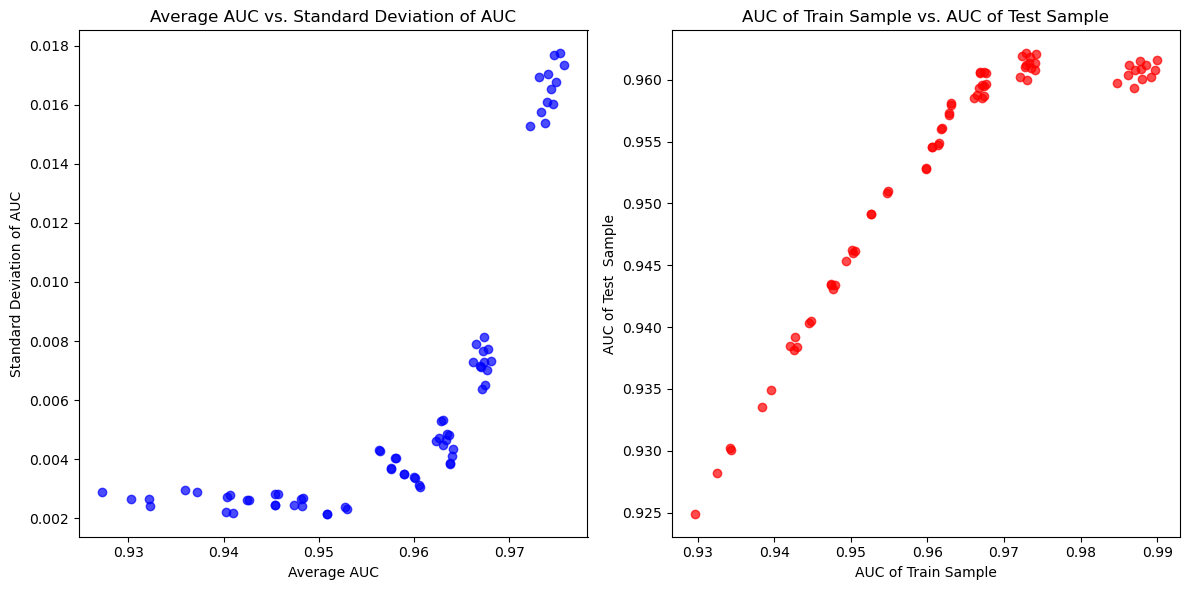

In [84]:
# Calculate average and standard deviation of AUC across three samples for each model
avg_auc = []
std_auc = []
auc_train = []
auc_test = []

for idx, row in sorted_results_df.iterrows():
    auc_train.append(row['AUC Train'])
    auc_test.append(row['AUC Test'])
    
    avg = (row['AUC Train'] + row['AUC Test']) / 2
    avg_auc.append(avg)
    std = ((row['AUC Train'] - avg)**2 + (row['AUC Test'] - avg)**2 / 2)**0.5
    std_auc.append(std)

# Create scatter plots

plt.figure(figsize=(12, 6))

# Scatter plot for Average AUC vs. Standard Deviation of AUC
plt.subplot(1, 2, 1)
plt.scatter(avg_auc, std_auc, color='b', alpha=0.7)
plt.xlabel('Average AUC')
plt.ylabel('Standard Deviation of AUC')
plt.title('Average AUC vs. Standard Deviation of AUC')

# Scatter plot for AUC of train sample vs. AUC of Test 2 sample
plt.subplot(1, 2, 2)
plt.scatter(auc_train, auc_test, color='r', alpha=0.7)
plt.xlabel('AUC of Train Sample')
plt.ylabel('AUC of Test  Sample')
plt.title('AUC of Train Sample vs. AUC of Test Sample')

plt.tight_layout()
plt.show()


In [85]:
sorted_results_df.to_csv('sorted_results.csv', index = False)

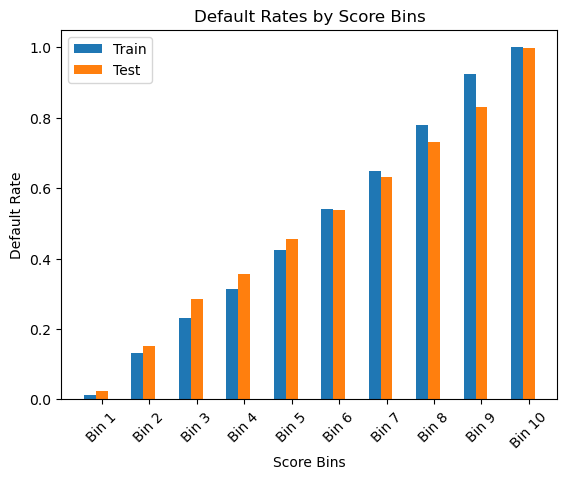

In [86]:
# Predict probabilities of default for train and test samples
train_scores = final_model_xgb.predict_proba(X_train[combined_important_features])[:, 1]
test_scores = final_model_xgb.predict_proba(X_test[combined_important_features])[:, 1]

num_bins = 10
train_scores_sorted = np.sort(train_scores)
bins = np.linspace(train_scores_sorted[0], train_scores_sorted[-1], num_bins+1)

# Calculate default rates for each bin
def calc_default_rates(scores, y, bins):
    df = pd.DataFrame({'Score': scores, 'Default': y})
    df['Bin'] = pd.cut(df['Score'], bins=bins, include_lowest=True)
    default_rates = df.groupby('Bin')['Default'].mean()
    return default_rates

train_default_rates = calc_default_rates(train_scores, y_train, bins)
test_default_rates = calc_default_rates(test_scores, y_test, bins)

# Create a bar chart
bar_width = 0.25
index = np.arange(num_bins)

plt.bar(index, train_default_rates, bar_width, label='Train')
plt.bar(index + bar_width, test_default_rates, bar_width, label='Test')

plt.xlabel('Score Bins')
plt.ylabel('Default Rate')
plt.xticks(index + bar_width, [f'Bin {i+1}' for i in range(num_bins)], rotation=45)
plt.legend()
plt.title('Default Rates by Score Bins')
plt.show()


In [87]:
# Print bin values and default rates
print("Bins and Default Rates:")
print("Bin Range\tTrain\t\tTest")
for i in range(num_bins):
    bin_range = f"[{bins[i]:.2f}, {bins[i+1]:.2f})"
    train_rate = train_default_rates.iloc[i]
    test_rate = test_default_rates.iloc[i]
    print(f"{bin_range}\t{train_rate:.4f}\t{test_rate:.4f}")


Bins and Default Rates:
Bin Range	Train		Test
[0.00, 0.10)	0.0138	0.0241
[0.10, 0.20)	0.1317	0.1522
[0.20, 0.30)	0.2318	0.2849
[0.30, 0.40)	0.3127	0.3559
[0.40, 0.50)	0.4235	0.4571
[0.50, 0.60)	0.5415	0.5388
[0.60, 0.70)	0.6487	0.6331
[0.70, 0.80)	0.7793	0.7300
[0.80, 0.90)	0.9256	0.8316
[0.90, 1.00)	0.9999	0.9985


### Mô hình tốt nhất và các chỉ số:

In [88]:
# Trích xuất tham số từ best_model_row
best_params = {
    'n_estimators': int(best_model_row['Number of Trees']),
    'learning_rate': float(best_model_row['Learning Rate']),
    'subsample': float(best_model_row['Subsample']),
    'colsample_bytree': float(best_model_row['Percentage of Features']) / 100,
    'scale_pos_weight': int(best_model_row['Weight of Default']),
    'random_state': 42
}

# Tái tạo mô hình tốt nhất
best_model = xgb.XGBClassifier(**best_params)

# Huấn luyện mô hình tốt nhất
best_model.fit(X_train[combined_important_features], y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [89]:
# Dự đoán nhãn và xác suất
y_pred_test = best_model.predict(X_test[combined_important_features])

y_prob_test = best_model.predict_proba(X_test[combined_important_features])[:, 1]


In [90]:
from sklearn.metrics import classification_report, roc_auc_score

# Classification report cho tập kiểm tra 1
print("Classification Report for Test:")
print(classification_report(y_test, y_pred_test))



# Tính AUC và Gini Index cho tập kiểm tra 1
auc_test = roc_auc_score(y_test, y_prob_test)
gini_test = 2 * auc_test - 1
print(f"\nAUC Test 1: {auc_test:.4f}")
print(f"Gini Index Test 1: {gini_test:.4f}")



Classification Report for Test:
              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88     14168
         1.0       0.88      0.89      0.88     14319

    accuracy                           0.88     28487
   macro avg       0.88      0.88      0.88     28487
weighted avg       0.88      0.88      0.88     28487


AUC Test 1: 0.9621
Gini Index Test 1: 0.9243


# Neural Network

## Missing Value replacement with 0

In [140]:
# Replace NaN values with 0 in the imputed DataFrames
X_train_nn = X_train_imputed.fillna(0)
X_test_nn = X_test.fillna(0)


## Outlier Treatment

In [141]:
# Calculate the 1st and 99th percentiles
percentiles = X_train_nn.quantile([0.01, 0.99])

# Cap and floor the values
X_train_nn = X_train_nn.clip(percentiles.iloc[0], percentiles.iloc[1], axis=1)
X_test_nn = X_test_nn.clip(percentiles.iloc[0], percentiles.iloc[1], axis=1)


## Normalization

In [142]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the train data and transform both train and test data
X_train_nn = scaler.fit_transform(X_train_nn)
X_test_nn = scaler.transform(X_test_nn)


### Dùng Pytorch

In [100]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import roc_auc_score
import pandas as pd

# DataFrame để lưu kết quả
results_df = pd.DataFrame(columns=['HL', 'Node', 'Activation Function', 'Dropout', 'Batch Size', 'AUC Train', 'AUC Test'])

# Siêu tham số
n_layers_values = [2, 4]
n_nodes_values = [4, 6]
activation_functions = {'relu': nn.ReLU, 'tanh': nn.Tanh}
dropout_rates = [0.5, 1.0]  # 50% dropout và không dropout
batch_sizes = [100, 1000]
epochs = 20
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Chuẩn bị dữ liệu
# Chuyển đổi dữ liệu sang torch.Tensor
X_train_nn = torch.tensor(X_train.to_numpy(), dtype=torch.float32).to(device)
y_train = torch.tensor(y_train, dtype=torch.float32).to(device)
X_test_nn = torch.tensor(X_test.to_numpy(), dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test.to_numpy(), dtype=torch.float32).to(device)

# Xây dựng mô hình mạng nơ-ron
class NeuralNet(nn.Module):
    def __init__(self, n_layers, n_nodes, activation, dropout_rate):
        super(NeuralNet, self).__init__()
        layers = []
        input_size = X_train_nn.shape[1]  # Lấy số đặc trưng đầu vào từ dữ liệu
        for _ in range(n_layers):
            layers.append(nn.Linear(input_size, n_nodes))  # Kết nối lớp
            layers.append(activation())
            if dropout_rate < 1.0:
                layers.append(nn.Dropout(p=dropout_rate))
            input_size = n_nodes  # Cập nhật đầu vào cho lớp tiếp theo
        layers.append(nn.Linear(n_nodes, 1))  # Lớp đầu ra
        layers.append(nn.Sigmoid())  # Sigmoid cho nhị phân
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)

# Huấn luyện mô hình
def train_model(model, criterion, optimizer, train_data, train_labels, batch_size, epochs):
    model.train()
    for epoch in range(epochs):
        for i in range(0, len(train_data), batch_size):
            batch_x = train_data[i:i+batch_size]
            batch_y = train_labels[i:i+batch_size]
            
            # Forward pass
            outputs = model(batch_x).squeeze()  # Loại bỏ kích thước không cần thiết
            loss = criterion(outputs, batch_y)

            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

# Đánh giá mô hình
def evaluate_model(model, X, y):
    model.eval()
    with torch.no_grad():
        predictions = model(X).squeeze()
    return roc_auc_score(y.cpu().numpy(), predictions.cpu().numpy())

# Lặp qua các siêu tham số
for n_layers in n_layers_values:
    for n_nodes in n_nodes_values:
        for activation_name, activation in activation_functions.items():
            for dropout in dropout_rates:
                for batch_size in batch_sizes:
                    print(f"Training model: Layers={n_layers}, Nodes={n_nodes}, Activation={activation_name}, "
                          f"Dropout={int(dropout * 100)}%, Batch Size={batch_size}")
                    model = NeuralNet(n_layers, n_nodes, activation, dropout).to(device)
                    criterion = nn.BCELoss()
                    optimizer = optim.Adam(model.parameters(), lr=0.001)

                    train_model(model, criterion, optimizer, X_train_nn, y_train, batch_size, epochs)

                    auc_train = evaluate_model(model, X_train_nn, y_train)
                    auc_test = evaluate_model(model, X_test_nn, y_test_tensor)

                    result_dict = {
                        'HL': n_layers,
                        'Node': n_nodes,
                        'Activation Function': activation_name,
                        'Dropout': f"{int(dropout * 100)}%" if dropout < 1.0 else "No Dropout",
                        'Batch Size': batch_size,
                        'AUC Train': auc_train,
                        'AUC Test': auc_test
                    }
                    results_df = pd.concat([results_df, pd.DataFrame([result_dict])], ignore_index=True)
                    print(f"Train AUC: {auc_train:.4f}, Test AUC: {auc_test:.4f}")

# Lưu kết quả ra file CSV
results_df.to_csv('grid_search_results_pytorch.csv', index=False)


/var/folders/_8/r6tmrd5913l149_tjy55m9xm0000gn/T/ipykernel_15107/2798626296.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.float32).to(device)


Training model: Layers=2, Nodes=4, Activation=relu, Dropout=50%, Batch Size=100
Train AUC: 0.5000, Test AUC: 0.5000
Training model: Layers=2, Nodes=4, Activation=relu, Dropout=50%, Batch Size=1000
Train AUC: 0.5000, Test AUC: 0.5000
Training model: Layers=2, Nodes=4, Activation=relu, Dropout=100%, Batch Size=100
Train AUC: 0.5000, Test AUC: 0.5000
Training model: Layers=2, Nodes=4, Activation=relu, Dropout=100%, Batch Size=1000
Train AUC: 0.5000, Test AUC: 0.5000
Training model: Layers=2, Nodes=4, Activation=tanh, Dropout=50%, Batch Size=100
Train AUC: 0.5000, Test AUC: 0.5000
Training model: Layers=2, Nodes=4, Activation=tanh, Dropout=50%, Batch Size=1000
Train AUC: 0.5000, Test AUC: 0.5000
Training model: Layers=2, Nodes=4, Activation=tanh, Dropout=100%, Batch Size=100
Train AUC: 0.5000, Test AUC: 0.5000
Training model: Layers=2, Nodes=4, Activation=tanh, Dropout=100%, Batch Size=1000
Train AUC: 0.5000, Test AUC: 0.5000
Training model: Layers=2, Nodes=6, Activation=relu, Dropout=50%,

In [102]:
# Sort the results by AUC Test 1 and AUC Test 2 (descending order)
sorted_results_df_2 = results_df.sort_values(by=['AUC Test'], ascending=False)

# Print the sorted table
print(sorted_results_df_2)

sorted_results_df_2.to_csv('sorted_results_df_2.csv', index = False)

# Select the top row as the best model
best_model_row_2 = sorted_results_df_2.iloc[0]
print("Best model parameters:")
print(best_model_row_2)

   HL Node Activation Function     Dropout Batch Size  AUC Train  AUC Test
10  2    6                relu  No Dropout        100   0.913619  0.905087
19  4    4                relu  No Dropout       1000   0.886154  0.880368
13  2    6                tanh         50%       1000   0.499970  0.500105
11  2    6                relu  No Dropout       1000   0.500015  0.500035
0   2    4                relu         50%        100   0.500000  0.500000
22  4    4                tanh  No Dropout        100   0.500000  0.500000
20  4    4                tanh         50%        100   0.500000  0.500000
21  4    4                tanh         50%       1000   0.500000  0.500000
23  4    4                tanh  No Dropout       1000   0.500000  0.500000
17  4    4                relu         50%       1000   0.500000  0.500000
24  4    6                relu         50%        100   0.500000  0.500000
25  4    6                relu         50%       1000   0.500000  0.500000
27  4    6               

In [125]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import roc_auc_score, classification_report
import pandas as pd

# Các biến lưu thông tin mô hình tốt nhất
best_auc = 0
best_model = None
best_params = None

# Định nghĩa lớp NeuralNet
class NeuralNet(nn.Module):
    def __init__(self, n_layers, n_nodes, activation, dropout_rate):
        super(NeuralNet, self).__init__()
        layers = []
        input_size = X_train_nn.shape[1]  # Lấy số đặc trưng đầu vào
        for _ in range(n_layers):
            layers.append(nn.Linear(input_size, n_nodes))  # Lớp kết nối đầy đủ
            layers.append(activation())  # Gọi lớp kích hoạt
            if dropout_rate < 1.0:
                layers.append(nn.Dropout(p=dropout_rate))  # Dropout
            input_size = n_nodes
        layers.append(nn.Linear(n_nodes, 1))  # Lớp đầu ra
        layers.append(nn.Sigmoid())  # Sigmoid cho nhị phân
        self.net = nn.Sequential(*layers)

    def forward(self, x):
        return self.net(x)

# Hàm đánh giá
def evaluate_model(model, X, y, threshold=0.5):
    model.eval()
    with torch.no_grad():
        predictions = model(X).squeeze().cpu().numpy()  # Dự đoán xác suất
        y_true = y.cpu().numpy()

        # Dự đoán nhãn
        y_pred = (predictions >= threshold).astype(int)

        # Tính AUC và Gini Index
        auc = roc_auc_score(y_true, predictions)
        gini = 2 * auc - 1

        # Classification Report
        report = classification_report(y_true, y_pred, output_dict=True)

        # Trích xuất accuracy
        accuracy = report['accuracy']

        return report, auc, gini, accuracy


# Lặp qua các siêu tham số
for n_layers in n_layers_values:
    for n_nodes in n_nodes_values:
        for activation_name, activation in activation_functions.items():
            for dropout in dropout_rates:
                for batch_size in batch_sizes:
                    print(f"Training model: Layers={n_layers}, Nodes={n_nodes}, Activation={activation_name}, "
                          f"Dropout={int(dropout * 100)}%, Batch Size={batch_size}")
                    
                    # Khởi tạo mô hình
                    model = NeuralNet(
                        n_layers=n_layers,
                        n_nodes=n_nodes,
                        activation=activation,  # Truyền lớp kích hoạt
                        dropout_rate=dropout
                    ).to(device)
                    
                    criterion = nn.BCELoss()
                    optimizer = optim.Adam(model.parameters(), lr=0.001)

                    # Huấn luyện mô hình
                    train_model(model, criterion, optimizer, X_train_nn, y_train, batch_size, epochs)

                    # Đánh giá mô hình trên tập test
                    test_report, auc_test, gini_test, acc_test = evaluate_model(model, X_test_nn, y_test_tensor)


                    # Cập nhật mô hình tốt nhất
                    if auc_test > best_auc:
                        best_auc = auc_test
                        best_model = model
                        best_params = {
                            'n_layers': n_layers,
                            'n_nodes': n_nodes,
                            'activation': activation_name,
                            'dropout': f"{int(dropout * 100)}%" if dropout < 1.0 else "No Dropout",
                            'batch_size': batch_size
                        }

# Đánh giá và in kết quả của mô hình tốt nhất
print("\nBest Model Parameters:")
print(best_params)

# Đánh giá trên tập train
train_report, auc_train, gini_train, acc_train = evaluate_model(best_model, X_train_nn, y_train)

# Đánh giá trên tập test
test_report, auc_test, gini_test, acc_test = evaluate_model(best_model, X_test_nn, y_test_tensor)

print("\n=== Best Model Results ===")
print(f"\nClassification Report (Train):\n{pd.DataFrame(train_report)}")
print(f"AUC Train: {auc_train:.4f}, Gini Train: {gini_train:.4f}")
print(f"\nClassification Report (Test):\n{pd.DataFrame(test_report)}")
print(f"AUC Test: {auc_test:.4f}, Gini Test: {gini_test:.4f}")


Training model: Layers=2, Nodes=4, Activation=relu, Dropout=50%, Batch Size=100
Training model: Layers=2, Nodes=4, Activation=relu, Dropout=50%, Batch Size=1000


/Users/doanhtuan137/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/doanhtuan137/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/doanhtuan137/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training model: Layers=2, Nodes=4, Activation=relu, Dropout=100%, Batch Size=100


/Users/doanhtuan137/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/doanhtuan137/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/doanhtuan137/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training model: Layers=2, Nodes=4, Activation=relu, Dropout=100%, Batch Size=1000


/Users/doanhtuan137/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/doanhtuan137/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/doanhtuan137/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training model: Layers=2, Nodes=4, Activation=tanh, Dropout=50%, Batch Size=100


/Users/doanhtuan137/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/doanhtuan137/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/doanhtuan137/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training model: Layers=2, Nodes=4, Activation=tanh, Dropout=50%, Batch Size=1000


/Users/doanhtuan137/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/doanhtuan137/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/doanhtuan137/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training model: Layers=2, Nodes=4, Activation=tanh, Dropout=100%, Batch Size=100


/Users/doanhtuan137/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/doanhtuan137/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/doanhtuan137/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training model: Layers=2, Nodes=4, Activation=tanh, Dropout=100%, Batch Size=1000


/Users/doanhtuan137/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/doanhtuan137/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/doanhtuan137/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training model: Layers=2, Nodes=6, Activation=relu, Dropout=50%, Batch Size=100


/Users/doanhtuan137/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/doanhtuan137/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/doanhtuan137/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training model: Layers=2, Nodes=6, Activation=relu, Dropout=50%, Batch Size=1000


/Users/doanhtuan137/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/doanhtuan137/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/doanhtuan137/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training model: Layers=2, Nodes=6, Activation=relu, Dropout=100%, Batch Size=100


/Users/doanhtuan137/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/doanhtuan137/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/doanhtuan137/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training model: Layers=2, Nodes=6, Activation=relu, Dropout=100%, Batch Size=1000
Training model: Layers=2, Nodes=6, Activation=tanh, Dropout=50%, Batch Size=100


/Users/doanhtuan137/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/doanhtuan137/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/doanhtuan137/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training model: Layers=2, Nodes=6, Activation=tanh, Dropout=50%, Batch Size=1000


/Users/doanhtuan137/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/doanhtuan137/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/doanhtuan137/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training model: Layers=2, Nodes=6, Activation=tanh, Dropout=100%, Batch Size=100


/Users/doanhtuan137/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/doanhtuan137/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/doanhtuan137/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training model: Layers=2, Nodes=6, Activation=tanh, Dropout=100%, Batch Size=1000


/Users/doanhtuan137/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/doanhtuan137/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/doanhtuan137/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training model: Layers=4, Nodes=4, Activation=relu, Dropout=50%, Batch Size=100


/Users/doanhtuan137/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/doanhtuan137/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/doanhtuan137/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training model: Layers=4, Nodes=4, Activation=relu, Dropout=50%, Batch Size=1000


/Users/doanhtuan137/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/doanhtuan137/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/doanhtuan137/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training model: Layers=4, Nodes=4, Activation=relu, Dropout=100%, Batch Size=100
Training model: Layers=4, Nodes=4, Activation=relu, Dropout=100%, Batch Size=1000
Training model: Layers=4, Nodes=4, Activation=tanh, Dropout=50%, Batch Size=100


/Users/doanhtuan137/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/doanhtuan137/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/doanhtuan137/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training model: Layers=4, Nodes=4, Activation=tanh, Dropout=50%, Batch Size=1000


/Users/doanhtuan137/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/doanhtuan137/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/doanhtuan137/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training model: Layers=4, Nodes=4, Activation=tanh, Dropout=100%, Batch Size=100


/Users/doanhtuan137/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/doanhtuan137/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/doanhtuan137/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training model: Layers=4, Nodes=4, Activation=tanh, Dropout=100%, Batch Size=1000


/Users/doanhtuan137/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/doanhtuan137/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/doanhtuan137/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training model: Layers=4, Nodes=6, Activation=relu, Dropout=50%, Batch Size=100


/Users/doanhtuan137/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/doanhtuan137/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/doanhtuan137/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training model: Layers=4, Nodes=6, Activation=relu, Dropout=50%, Batch Size=1000


/Users/doanhtuan137/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/doanhtuan137/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/doanhtuan137/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training model: Layers=4, Nodes=6, Activation=relu, Dropout=100%, Batch Size=100
Training model: Layers=4, Nodes=6, Activation=relu, Dropout=100%, Batch Size=1000
Training model: Layers=4, Nodes=6, Activation=tanh, Dropout=50%, Batch Size=100


/Users/doanhtuan137/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/doanhtuan137/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/doanhtuan137/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training model: Layers=4, Nodes=6, Activation=tanh, Dropout=50%, Batch Size=1000


/Users/doanhtuan137/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/doanhtuan137/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/doanhtuan137/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training model: Layers=4, Nodes=6, Activation=tanh, Dropout=100%, Batch Size=100


/Users/doanhtuan137/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/doanhtuan137/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/doanhtuan137/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training model: Layers=4, Nodes=6, Activation=tanh, Dropout=100%, Batch Size=1000


/Users/doanhtuan137/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/doanhtuan137/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/doanhtuan137/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Best Model Parameters:
{'n_layers': 4, 'n_nodes': 6, 'activation': 'relu', 'dropout': 'No Dropout', 'batch_size': 100}

=== Best Model Results ===

Classification Report (Train):
                    0.0           1.0  accuracy     macro avg  weighted avg
precision      0.950497      0.755478  0.826365      0.852987      0.853209
recall         0.689423      0.963930  0.826365      0.826677      0.826365
f1-score       0.799179      0.847068  0.826365      0.823123      0.823069
support    33309.000000  33158.000000  0.826365  66467.000000  66467.000000
AUC Train: 0.9106, Gini Train: 0.8212

Classification Report (Test):
                    0.0           1.0  accuracy     macro avg  weighted avg
precision      0.941521      0.752028  0.820164      0.846775      0.846272
recall         0.680689      0.958167  0.820164      0.819428      0.820164
f1-score       0.790136      0.842674  0.820164      0.816405      0.816544
support    14168.000000  14319.000000  0.820164  28487.000000  2848

In [145]:
# Định dạng Classification Report (Train)
train_report_df = pd.DataFrame(train_report).transpose()
train_report_df = train_report_df.round(4)  # Làm tròn 4 chữ số thập phân

# Định dạng Classification Report (Test)
test_report_df = pd.DataFrame(test_report).transpose()
test_report_df = test_report_df.round(4)  # Làm tròn 4 chữ số thập phân

# In kết quả
print("\n=== Best Model Results ===")
print("\nClassification Report (Train):")
print(train_report_df)
print(f"\nAUC Train: {auc_train:.4f}, Gini Train: {gini_train:.4f}")

print("\nClassification Report (Test):")
print(test_report_df)
print(f"\nAUC Test: {auc_test:.4f}, Gini Test: {gini_test:.4f}")



=== Best Model Results ===

Classification Report (Train):
              precision  recall  f1-score     support
0.0              0.9505  0.6894    0.7992  33309.0000
1.0              0.7555  0.9639    0.8471  33158.0000
accuracy         0.8264  0.8264    0.8264      0.8264
macro avg        0.8530  0.8267    0.8231  66467.0000
weighted avg     0.8532  0.8264    0.8231  66467.0000

AUC Train: 0.9068, Gini Train: 0.8212

Classification Report (Test):
              precision  recall  f1-score     support
0.0              0.9415  0.6807    0.7901  14168.0000
1.0              0.7520  0.9582    0.8427  14319.0000
accuracy         0.8202  0.8202    0.8202      0.8202
macro avg        0.8468  0.8194    0.8164  28487.0000
weighted avg     0.8463  0.8202    0.8165  28487.0000

AUC Test: 0.9027, Gini Test: 0.8054


### Grid Search với Neural Network

In [146]:
import itertools
import numpy as np

# Lưới siêu tham số
param_grid = {
    'n_layers': [2, 3, 4],  # Số lớp ẩn
    'n_nodes': [16, 32, 64],  # Số nút trong mỗi lớp
    'activation': ['relu', 'tanh'],  # Hàm kích hoạt
    'dropout_rate': [0.5, 0.3, 0.1],  # Tỷ lệ Dropout
    'batch_size': [32, 64],  # Kích thước batch
    'learning_rate': [0.001, 0.0001]  # Learning rate
}

# Tạo tất cả các tổ hợp siêu tham số
grid = list(itertools.product(*param_grid.values()))


## Best Model

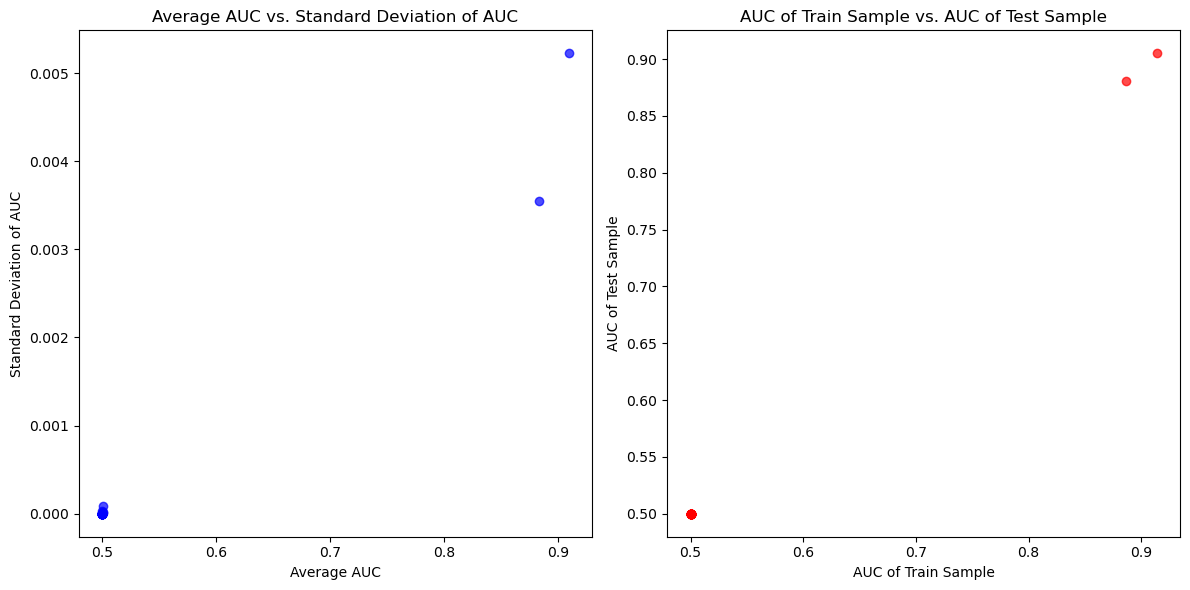

In [152]:
# Calculate average and standard deviation of AUC across three samples for each model
avg_auc = []
std_auc = []
auc_train = []
auc_test = []

for idx, row in sorted_results_df_2.iterrows():
    auc_train.append(row['AUC Train'])
    auc_test.append(row['AUC Test'])
    
    avg = (row['AUC Train'] + row['AUC Test'] ) / 2
    avg_auc.append(avg)
    std = ((row['AUC Train'] - avg)**2 + (row['AUC Test'] - avg)**2  / 2)**0.5
    std_auc.append(std)

# Create scatter plots

plt.figure(figsize=(12, 6))

# Scatter plot for Average AUC vs. Standard Deviation of AUC
plt.subplot(1, 2, 1)
plt.scatter(avg_auc, std_auc, color='b', alpha=0.7)
plt.xlabel('Average AUC')
plt.ylabel('Standard Deviation of AUC')
plt.title('Average AUC vs. Standard Deviation of AUC')

# Scatter plot for AUC of train sample vs. AUC of Test sample
plt.subplot(1, 2, 2)
plt.scatter(auc_train, auc_test, color='r', alpha=0.7)
plt.xlabel('AUC of Train Sample')
plt.ylabel('AUC of Test Sample')
plt.title('AUC of Train Sample vs. AUC of Test Sample')

plt.tight_layout()
plt.show()


In [153]:
print(best_model_row)
print("----------------------------------")
print(best_model_row_2)

Number of Trees           100.000000
Learning Rate               0.100000
Subsample                   0.800000
Percentage of Features     50.000000
Weight of Default           1.000000
AUC Train                   0.972794
AUC Test                    0.962145
Name: 42, dtype: float64
----------------------------------
HL                              2
Node                            6
Activation Function          relu
Dropout                No Dropout
Batch Size                    100
AUC Train                0.913619
AUC Test                 0.905087
Name: 10, dtype: object


In [155]:
# Extract AUC scores for XGBoost and Neural Network models
xgb_auc_test = best_model_row['AUC Test']
nn_auc_test = best_model_row_2['AUC Test']

# Compare the average AUC scores
avg_auc_xgb = (xgb_auc_test + xgb_auc_test) / 2
avg_auc_nn = (nn_auc_test + nn_auc_test) / 2

print(f"Average AUC for XGBoost: {avg_auc_xgb}")
print(f"Average AUC for Neural Network: {avg_auc_nn}")

# Determine the best model
if avg_auc_xgb > avg_auc_nn:
    print("XGBoost is the best model.")
else:
    print("Neural Network is the best model.")

Average AUC for XGBoost: 0.9621446604510305
Average AUC for Neural Network: 0.9050870611790733
XGBoost is the best model.


In [157]:
# Get predictions for the train dataset
xgb_predictions_train = final_model_xgb.predict(X_train_imputed[combined_important_features])

# Get predictions for the test1 dataset
xgb_predictions_test1 = final_model_xgb.predict(X_test[combined_important_features])


# Get predicted probabilities for the train dataset
xgb_probs_train = final_model_xgb.predict_proba(X_train_imputed[combined_important_features])

# Get predicted probabilities for the test1 dataset
xgb_probs_test1 = final_model_xgb.predict_proba(X_test[combined_important_features])


## ENSEMBLE

In [159]:
# Huấn luyện mô hình XGBoost
xgb_model = xgb.XGBClassifier(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    scale_pos_weight=1  # Tùy chỉnh nếu dữ liệu mất cân bằng
)

xgb_model.fit(X_train_nn, y_train)  # Huấn luyện mô hình


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [160]:
import numpy as np
import torch
from sklearn.metrics import roc_auc_score

# Dự đoán xác suất từ XGBoost
xgb_probs_train = xgb_model.predict_proba(X_train_nn)[:, 1]
xgb_probs_test = xgb_model.predict_proba(X_test_nn)[:, 1]

# Dự đoán xác suất từ Neural Network
with torch.no_grad():
    nn_probs_train = loaded_model(torch.tensor(X_train_nn, dtype=torch.float32).to(device)).cpu().numpy().flatten()
    nn_probs_test = loaded_model(torch.tensor(X_test_nn, dtype=torch.float32).to(device)).cpu().numpy().flatten()


/var/folders/_8/r6tmrd5913l149_tjy55m9xm0000gn/T/ipykernel_15107/412577186.py:11: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  nn_probs_train = loaded_model(torch.tensor(X_train_nn, dtype=torch.float32).to(device)).cpu().numpy().flatten()


### Stacking Ensemble: Sử dụng một mô hình meta (Logistic Regression) để học cách kết hợp các xác suất:

In [161]:
from sklearn.linear_model import LogisticRegression

# Chuẩn bị dữ liệu cho meta-model
X_meta_train = np.vstack((xgb_probs_train, nn_probs_train)).T
X_meta_test = np.vstack((xgb_probs_test, nn_probs_test)).T

# Huấn luyện meta-model
meta_model = LogisticRegression()
meta_model.fit(X_meta_train, y_train)

# Dự đoán với meta-model
ensemble_probs_train = meta_model.predict_proba(X_meta_train)[:, 1]
ensemble_probs_test = meta_model.predict_proba(X_meta_test)[:, 1]


In [162]:
# AUC
ensemble_auc_train = roc_auc_score(y_train, ensemble_probs_train)
ensemble_auc_test = roc_auc_score(y_test, ensemble_probs_test)

# Gini Index
ensemble_gini_train = 2 * ensemble_auc_train - 1
ensemble_gini_test = 2 * ensemble_auc_test - 1

# In kết quả
print(f"Ensemble AUC Train: {ensemble_auc_train:.4f}, Gini Train: {ensemble_gini_train:.4f}")
print(f"Ensemble AUC Test: {ensemble_auc_test:.4f}, Gini Test: {ensemble_gini_test:.4f}")


Ensemble AUC Train: 0.9882, Gini Train: 0.9764
Ensemble AUC Test: 0.9608, Gini Test: 0.9216


In [164]:
from sklearn.metrics import classification_report

# Chuyển đổi xác suất thành nhãn với ngưỡng 0.5
ensemble_pred_train = (ensemble_probs_train >= 0.5).astype(int)
ensemble_pred_test = (ensemble_probs_test >= 0.5).astype(int)

# Classification report
print("Ensemble Classification Report - Train:")
print(classification_report(y_train, ensemble_pred_train))

print("\nEnsemble Classification Report - Test:")
print(classification_report(y_test, ensemble_pred_test))



Ensemble Classification Report - Train:
              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94     33309
         1.0       0.94      0.94      0.94     33158

    accuracy                           0.94     66467
   macro avg       0.94      0.94      0.94     66467
weighted avg       0.94      0.94      0.94     66467


Ensemble Classification Report - Test:
              precision    recall  f1-score   support

         0.0       0.88      0.88      0.88     14168
         1.0       0.88      0.89      0.88     14319

    accuracy                           0.88     28487
   macro avg       0.88      0.88      0.88     28487
weighted avg       0.88      0.88      0.88     28487



## Mô hình cơ bản

In [165]:
X_train_resampled, y_train_resampled = X_train, y_train


In [171]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report

# Khởi tạo mô hình Random Forest
rf_model = RandomForestClassifier(
    n_estimators=200,        # Số cây trong rừng
    max_depth=10,            # Độ sâu tối đa của cây
    min_samples_split=5,     # Số mẫu tối thiểu để chia nhánh
    min_samples_leaf=2,      # Số mẫu tối thiểu tại lá
    max_features='sqrt',     # Số đặc trưng sử dụng tại mỗi cây
    random_state=42          # Để tái hiện kết quả
)

# Huấn luyện mô hình trên tập huấn luyện
rf_model.fit(X_train, y_train)

# Dự đoán xác suất trên tập kiểm tra
rf_probs_train = rf_model.predict_proba(X_train)[:, 1]
rf_probs_test_combined = rf_model.predict_proba(X_test)[:, 1]

# Tính AUC và Classification Report
auc_train = roc_auc_score(y_train, rf_probs_train)
auc_test_combined = roc_auc_score(y_test, rf_probs_test_combined)

# Chuyển đổi xác suất thành nhãn
rf_preds_test_combined = (rf_probs_test_combined >= 0.5).astype(int)

# Classification Report
report = classification_report(y_test, rf_preds_test_combined)

# In kết quả
print(f"Random Forest AUC Train: {auc_train:.4f}")
print(f"Random Forest AUC Test Combined: {auc_test_combined:.4f}")
print("\nClassification Report:")
print(report)


Random Forest AUC Train: 0.9794
Random Forest AUC Test Combined: 0.9541

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.81      0.86     14168
         1.0       0.83      0.93      0.88     14319

    accuracy                           0.87     28487
   macro avg       0.87      0.87      0.87     28487
weighted avg       0.87      0.87      0.87     28487



## Decision Tree

In [172]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, classification_report

# Khởi tạo mô hình Decision Tree với các tham số cơ bản
dt_model = DecisionTreeClassifier(
    criterion='gini',      # Tiêu chí chia nhánh ('gini' hoặc 'entropy')
    max_depth=5,           # Độ sâu tối đa của cây
    min_samples_split=10,  # Số mẫu tối thiểu để chia nhánh
    min_samples_leaf=5,    # Số mẫu tối thiểu tại lá
    random_state=42        # Để tái hiện kết quả
)

# Huấn luyện mô hình trên tập huấn luyện
dt_model.fit(X_train, y_train)

# Dự đoán xác suất trên tập kiểm tra
dt_probs_train = dt_model.predict_proba(X_train)[:, 1]
dt_probs_test_combined = dt_model.predict_proba(X_test)[:, 1]

# Tính AUC và Classification Report
auc_train = roc_auc_score(y_train, dt_probs_train)
auc_test_combined = roc_auc_score(y_test, dt_probs_test_combined)

# Chuyển đổi xác suất thành nhãn
dt_preds_test_combined = (dt_probs_test_combined >= 0.5).astype(int)

# Classification Report
report = classification_report(y_test, dt_preds_test_combined)

# In kết quả
print(f"Decision Tree AUC Train: {auc_train:.4f}")
print(f"Decision Tree AUC Test: {auc_test_combined:.4f}")
print("\nClassification Report:")
print(report)


Decision Tree AUC Train: 0.9169
Decision Tree AUC Test: 0.9123

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.83      0.84     14168
         1.0       0.84      0.87      0.85     14319

    accuracy                           0.85     28487
   macro avg       0.85      0.85      0.85     28487
weighted avg       0.85      0.85      0.85     28487



## Logistic Regression

In [173]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report

# Khởi tạo mô hình Logistic Regression
logistic_model = LogisticRegression(
    penalty='l2',          # Regularization L2 (Ridge)
    C=1.0,                 # Độ mạnh của regularization (C lớn hơn -> ít regularization hơn)
    solver='lbfgs',        # Trình giải toán (phù hợp với dữ liệu nhỏ đến trung bình)
    max_iter=1000,         # Số lần lặp tối đa
    random_state=42
)

# Huấn luyện mô hình trên tập huấn luyện
logistic_model.fit(X_train, y_train)

# Dự đoán xác suất trên tập kiểm tra
logistic_probs_train = logistic_model.predict_proba(X_train)[:, 1]
logistic_probs_test_combined = logistic_model.predict_proba(X_test)[:, 1]

# Tính AUC và Classification Report
auc_train = roc_auc_score(y_train, logistic_probs_train)
auc_test_combined = roc_auc_score(y_test, logistic_probs_test_combined)

# Chuyển đổi xác suất thành nhãn
logistic_preds_test_combined = (logistic_probs_test_combined >= 0.5).astype(int)

# Classification Report
report = classification_report(y_test, logistic_preds_test_combined)

# In kết quả
print(f"Logistic Regression AUC Train: {auc_train:.4f}")
print(f"Logistic Regression AUC Test Combined: {auc_test_combined:.4f}")
print("\nClassification Report:")
print(report)


/Users/doanhtuan137/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression AUC Train: 0.8968
Logistic Regression AUC Test Combined: 0.8907

Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.79      0.82     14168
         1.0       0.81      0.86      0.83     14319

    accuracy                           0.83     28487
   macro avg       0.83      0.83      0.83     28487
weighted avg       0.83      0.83      0.83     28487

